In [1]:
import kagglehub

path = kagglehub.dataset_download("kenny3s/casia-webface")

print("Path to dataset files:", path)
path=path+"/datasets"

100%|██████████| 1.03G/1.03G [00:38<00:00, 28.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kenny3s/casia-webface/versions/1


In [2]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_images(path):
    images = []
    labels = []
    counter = 0

    for label in os.listdir(path):
        folder_path = os.path.join(path, label)

        # Skip if not a directory
        if not os.path.isdir(folder_path):
            continue

        if len(os.listdir(folder_path)) < 350:
            continue
        else:
            for img in os.listdir(folder_path):
                image_path = os.path.join(folder_path, img)

                # Skip if the file is not an image
                if not os.path.isfile(image_path):
                    continue

                image = cv.imread(image_path)
                if image is None:  # Skip corrupted or unreadable files
                    print(f"Skipping {image_path}, image not loaded.")
                    continue

                image = cv.resize(image, (64, 64))  # Resize all images to a fixed size
                images.append(image)
                labels.append(label)

            counter += 1
            if counter == 51:
                break

    return np.array(images), np.array(labels), counter


In [4]:
image, label,counter= load_images(path)

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Conv2DTranspose, UpSampling2D
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Conv2DTranspose, UpSampling2D,
    BatchNormalization, Dropout, LeakyReLU
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np


In [6]:
image=image/255
for i in range(0,2):
  mean=np.mean(image[:,:,:,i])
  std=np.std(image[:,:,:,i])
  image[:,:,:,i]=(image[:,:,:,i]-mean)/std

image=image.mean(axis=3)


51
1208167


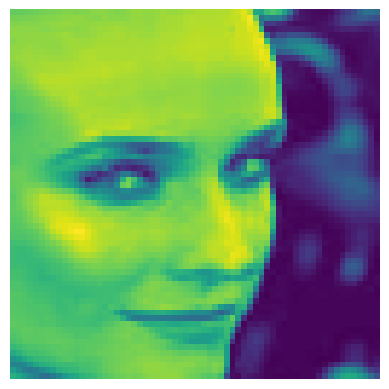

(23666, 64, 64)


In [7]:
print(counter)
plt.imshow(image[105])
print(label[105])
plt.axis('off')
plt.show()
print(image.shape)

In [8]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Compute mean face
mean_face = np.mean(image, axis=0)
normalized_images = image - mean_face

# Reshape images to 2D before calculating covariance
num_images = normalized_images.shape[0]
image_size = normalized_images.shape[1] * normalized_images.shape[2]
normalized_images_2d = normalized_images.reshape(num_images, image_size)

# Perform PCA
cov_matrix = np.cov(normalized_images_2d.T)  # Calculate covariance on the reshaped data
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenfaces by eigenvalues
sorted_indices = np.argsort(-eigenvalues)
eigenvectors = eigenvectors[:, sorted_indices]
eigenfaces = eigenvectors[:, :50]  # Select top 50 eigenfaces

# Project images onto PCA space
projected_images = np.dot(normalized_images_2d, eigenfaces) # Project reshaped data

# Train classifier
X_train, X_test, y_train, y_test = train_test_split(projected_images, label, test_size=0.5, random_state=42)

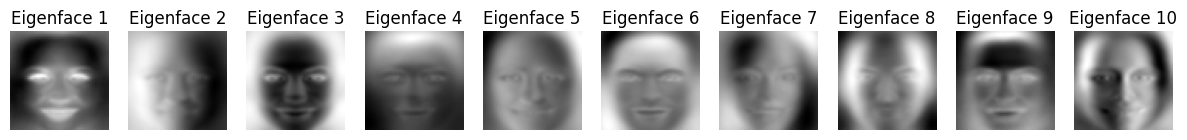

In [13]:

fig, axes = plt.subplots(1, 10, figsize=(15, 3))  # Adjust figure size as needed
for i in range(10):
    eigenface = eigenfaces[:, i].reshape(64, 64)  # Reshape to original image dimensions
    axes[i].imshow(eigenface, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Eigenface {i+1}')
plt.show()

In [ ]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_test_pred_SVM = svm_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred_SVM))

Test Accuracy: 0.42670474212530285


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_test_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.256576670128072


In [ ]:
import cv2 as cv
import numpy as np
from skimage.feature import local_binary_pattern
from scipy.stats import mode
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from sklearn.metrics import accuracy_score , confusion_matrix
def confusion_image(label_test, y_test_pred, cutoff=1):
    # Step 1: Compute the confusion matrix
    cm = confusion_matrix(label_test, y_test_pred)

    # Step 2: Normalize the confusion matrix to range [0, 255]
    cm_normalized = (cm / cm.max()) * 255
    cm_image = Image.fromarray(cm_normalized.astype('uint8'))

    # Step 3: Apply contrast stretching
    cm_image = ImageOps.autocontrast(cm_image, cutoff=cutoff)

    # Step 4: Plot the confusion matrix
    plt.imshow(cm_image, cmap='gray')
    plt.axis('off')
    plt.show()

    # Step 5: Calculate and return accuracy
    accuracy = (cm.diagonal().sum()) / cm.sum()
    print("Accuracy:", accuracy)


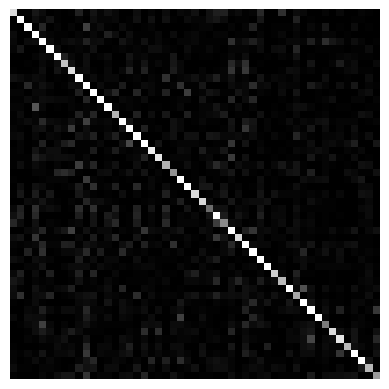

Accuracy: 0.42670474212530285


In [ ]:
confusion_image(y_test, y_test_pred_SVM)